In [1]:
from math import sqrt 
from matplotlib import pyplot
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential,Model
from keras.layers import Dense
from keras.layers import LSTM,GRU,SimpleRNN,Conv1D,Dropout,Bidirectional,Permute,Multiply,Flatten,MaxPooling1D,concatenate
from keras.layers import Input
import numpy as np
import pandas as pd
from keras.models import *
from keras.layers import *
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pydot
import keras.backend as K
from keras import regularizers
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
from keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'svg'#将图片保存为矢量图

plt.rcParams['font.sans-serif']=['FangSong_GB2312'] #用来正常显示中文
plt.rcParams['axes.unicode_minus']=False  #用来正常显示负号

Using TensorFlow backend.


#### 2.2 读取数据
写两个读取数据的函数，excel2train以及excel2test，excel2train从原始excel文件中读取前80%个数据点作为训练集，excel2test从原始excel文件中读取后20%个点作为验证集

In [2]:
def excel2train(path):
    data = pd.read_csv(path,index_col=0)
    scaler = MinMaxScaler()
    data = scaler.fit_transform(data)
    return data

In [3]:
path1 = 'C:/Users/shamrockyj/Desktop/毕设：航空发动机智能运维与健康管理/毕业论文/故障数据/VMD后数据/34_22/' #数据路径
path2 = 'C:/Users/shamrockyj/Desktop/毕设：航空发动机智能运维与健康管理/毕业论文/故障数据/VMD后数据/34_44/' #数据路径
path3 = 'C:/Users/shamrockyj/Desktop/毕设：航空发动机智能运维与健康管理/毕业论文/故障数据/VMD后数据/57_22/' #数据路径
path4 = 'C:/Users/shamrockyj/Desktop/毕设：航空发动机智能运维与健康管理/毕业论文/故障数据/VMD后数据/57_44/' #数据路径

#### 训练数据

In [4]:
traindata_10 = excel2train(path1+'34_22_正常.csv')
traindata_11 = excel2train(path1+'34_22_断齿.csv')
traindata_12 = excel2train(path1+'34_22_缺齿.csv')
traindata_13 = excel2train(path1+'34_22_磨损.csv')
traindata_14 = excel2train(path1+'34_22_裂纹.csv')
traindata_15 = excel2train(path1+'34_22_偏心.csv')

traindata_20 = excel2train(path2+'34_44_正常.csv')
traindata_21 = excel2train(path2+'34_44_断齿.csv')
traindata_22 = excel2train(path2+'34_44_缺齿.csv')
traindata_23 = excel2train(path2+'34_44_磨损.csv')
traindata_24 = excel2train(path2+'34_44_裂纹.csv')
traindata_25 = excel2train(path2+'34_44_偏心.csv')

traindata_30 = excel2train(path3+'57_22_正常.csv')
traindata_31 = excel2train(path3+'57_22_断齿.csv')
traindata_32 = excel2train(path3+'57_22_缺齿.csv')
traindata_33 = excel2train(path3+'57_22_磨损.csv')
traindata_34 = excel2train(path3+'57_22_裂纹.csv')
traindata_35 = excel2train(path3+'57_22_偏心.csv')

traindata_40 = excel2train(path4+'57_44_正常.csv')
traindata_41 = excel2train(path4+'57_44_断齿.csv')
traindata_42 = excel2train(path4+'57_44_缺齿.csv')
traindata_43 = excel2train(path4+'57_44_磨损.csv')
traindata_44 = excel2train(path4+'57_44_裂纹.csv')
traindata_45 = excel2train(path4+'57_44_偏心.csv')

In [5]:
traindata_10.shape

(3072000, 15)

In [6]:
traindata_0 = np.vstack([traindata_10,traindata_20,traindata_30,traindata_40])
traindata_1 = np.vstack([traindata_11,traindata_21,traindata_31,traindata_41])
traindata_2 = np.vstack([traindata_12,traindata_22,traindata_32,traindata_42])
traindata_3 = np.vstack([traindata_13,traindata_23,traindata_33,traindata_43])
traindata_4 = np.vstack([traindata_14,traindata_24,traindata_34,traindata_44])
traindata_5 = np.vstack([traindata_15,traindata_25,traindata_35,traindata_45])

In [7]:
length = 1024

In [8]:
traindata_0.shape

(12288000, 15)

In [11]:
traindata_0 = traindata_0[:,[3,4,5,6,7,8,12,13,14]]
traindata_1 = traindata_1[:,[3,4,5,6,7,8,12,13,14]]
traindata_2 = traindata_2[:,[3,4,5,6,7,8,12,13,14]]
traindata_3 = traindata_3[:,[3,4,5,6,7,8,12,13,14]]
traindata_4 = traindata_4[:,[3,4,5,6,7,8,12,13,14]]
traindata_5 = traindata_5[:,[3,4,5,6,7,8,12,13,14]]

In [12]:
channels = traindata_0.shape[1]
traindata_0 = traindata_0.reshape(-1,length,channels)
traindata_1 = traindata_1.reshape(-1,length,channels)
traindata_2 = traindata_2.reshape(-1,length,channels)
traindata_3 = traindata_3.reshape(-1,length,channels)
traindata_4 = traindata_4.reshape(-1,length,channels)
traindata_5 = traindata_5.reshape(-1,length,channels)

In [14]:
#利用随机数种子对数据和标签进行同顺序打乱
randnum = 200
np.random.seed(randnum)
np.random.shuffle(traindata_0)
np.random.seed(randnum)
np.random.shuffle(traindata_1)
np.random.seed(randnum)
np.random.shuffle(traindata_2)
np.random.seed(randnum)
np.random.shuffle(traindata_3)
np.random.seed(randnum)
np.random.shuffle(traindata_4)
np.random.seed(randnum)
np.random.shuffle(traindata_5)

In [15]:
traindata_0.shape

(12000, 1024, 9)

In [16]:
train_1 = traindata_0[:8000]
train_2 = traindata_1[:8000]
train_3 = traindata_2[:8000]
train_4 = traindata_3[:8000]
train_5 = traindata_4[:8000]
train_6 = traindata_5[:8000]

In [17]:
valid_1 = traindata_0[8000:10000]
valid_2 = traindata_1[8000:10000]
valid_3 = traindata_2[8000:10000]
valid_4 = traindata_3[8000:10000]
valid_5 = traindata_4[8000:10000]
valid_6 = traindata_5[8000:10000]

In [18]:
test_1 = traindata_0[10000:12000]
test_2 = traindata_1[10000:12000]
test_3 = traindata_2[10000:12000]
test_4 = traindata_3[10000:12000]
test_5 = traindata_4[10000:12000]
test_6 = traindata_5[10000:12000]

In [19]:
train_x = np.vstack([train_1,train_2,train_3,train_4,train_5,train_6])  #四列数据纵向堆叠

In [20]:
valid_x = np.vstack([valid_1,valid_2,valid_3,valid_4,valid_5,valid_6])  #四列数据纵向堆叠

In [21]:
test_x = np.vstack([test_1,test_2,test_3,test_4,test_5,test_6])  #四列数据纵向堆叠

生成训练数据集1024*15的矩阵及贴标签

In [22]:
features = 6
#定义标签生成函数
def LabelGeneration(train0,train1,train2,train3,train4,train5):
    y0 = np.full(train0.shape[0],0)
    y1 = np.full(train1.shape[0],1)
    y2 = np.full(train2.shape[0],2)
    y3 = np.full(train3.shape[0],3)
    y4 = np.full(train4.shape[0],4)
    y5 = np.full(train5.shape[0],5)
    
#     each_num = X//features #这里的X为数据总数
    y = []
    for i in range(features):
#         locals()['y'+str(i)] = np.full(each_num,i)
        y = np.append(y,locals()['y'+str(i)])
    return y

In [23]:
train_y = LabelGeneration(train_1,train_2,train_3,train_4,train_5,train_6)

In [24]:
train_y.shape

(48000,)

In [25]:
valid_y = LabelGeneration(valid_1,valid_2,valid_3,valid_4,valid_5,valid_6)

In [26]:
test_y = LabelGeneration(test_1,test_2,test_3,test_4,test_5,test_6)

In [27]:
#利用随机数种子对数据和标签进行同顺序打乱
randnum = 100
np.random.seed(randnum)
np.random.shuffle(train_x)
np.random.seed(randnum)
np.random.shuffle(train_y)

#将标签转换为独热码格式
from keras.utils.np_utils import to_categorical
one_hot_train_y = to_categorical(train_y)
print(one_hot_train_y)

#查看标签中每一个故障类别的个数
label = [np.argmax(item)+1 for item in one_hot_train_y]
label
s=set()#定义集合
for i in label:#循环列表中的元素
    if i not in s:#如果i不在集合中
        s.add(i)#将i添加到集合中
        print('Name:{}\tCount:{}'.format(i,label.count(i)))#格式化打印出i、i的count数

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]
Name:3	Count:8000
Name:6	Count:8000
Name:1	Count:8000
Name:4	Count:8000
Name:5	Count:8000
Name:2	Count:8000


In [28]:
#利用随机数种子对数据和标签进行同顺序打乱
randnum = 100
np.random.seed(randnum)
np.random.shuffle(valid_x)
np.random.seed(randnum)
np.random.shuffle(valid_y)

#将标签转换为独热码格式
from keras.utils.np_utils import to_categorical
one_hot_valid_y = to_categorical(valid_y)
print(one_hot_valid_y)

#查看标签中每一个故障类别的个数
label = [np.argmax(item)+1 for item in one_hot_valid_y]
label
s=set()#定义集合
for i in label:#循环列表中的元素
    if i not in s:#如果i不在集合中
        s.add(i)#将i添加到集合中
        print('Name:{}\tCount:{}'.format(i,label.count(i)))#格式化打印出i、i的count数

[[0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
Name:6	Count:2000
Name:2	Count:2000
Name:1	Count:2000
Name:4	Count:2000
Name:3	Count:2000
Name:5	Count:2000


In [29]:
#利用随机数种子对数据和标签进行同顺序打乱
randnum = 100
np.random.seed(randnum)
np.random.shuffle(test_x)
np.random.seed(randnum)
np.random.shuffle(test_y)

#将标签转换为独热码格式
from keras.utils.np_utils import to_categorical
one_hot_test_y = to_categorical(test_y)
print(one_hot_test_y)

#查看标签中每一个故障类别的个数
label = [np.argmax(item)+1 for item in one_hot_test_y]
label
s=set()#定义集合
for i in label:#循环列表中的元素
    if i not in s:#如果i不在集合中
        s.add(i)#将i添加到集合中
        print('Name:{}\tCount:{}'.format(i,label.count(i)))#格式化打印出i、i的count数

[[0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
Name:6	Count:2000
Name:2	Count:2000
Name:1	Count:2000
Name:4	Count:2000
Name:3	Count:2000
Name:5	Count:2000


train_x1 = train_x[:,: , 0:3]
train_x2 = train_x[:,: , 3:6]
train_x3 = train_x[:,: , 6:9]
train_x4 = train_x[:,: , 9:12]
train_x5 = train_x[:,: , 12:15]

valid_x1 = valid_x[:,: , 0:3]
valid_x2 = valid_x[:,: , 3:6]
valid_x3 = valid_x[:,: , 6:9]
valid_x4 = valid_x[:,: , 9:12]
valid_x5 = valid_x[:,: , 12:15]

test_x1 = test_x[:,: , 0:3]
test_x2 = test_x[:,: , 3:6]
test_x3 = test_x[:,: , 6:9]
test_x4 = test_x[:,: , 9:12]
test_x5 = test_x[:,: , 12:15]

#### 创建并训练模型

In [30]:
input_layer1 = Input((length,9),name='input1')
conv1 = Conv1D(32, 3,strides=1, padding='same',activation='relu',kernel_regularizer = regularizers.l2(0.001))(input_layer1)
conv1 = Conv1D(64, 3,strides=1, padding='same',activation='relu',kernel_regularizer = regularizers.l2(0.001))(conv1)
conv1 = Dropout(0.2)(conv1)
# conv1 = Conv1D(64, 3,strides=1, padding='same')(conv1)
# conv1 = Dropout(0.2)(conv1)
# conv1 = Conv1D(32, 3,strides=1, padding='same')(conv1)
# conv1 = Dropout(0.2)(conv1)
Maxpooling1 = MaxPooling1D(3, 2, padding='same')(conv1)
# BN1 = BatchNormalization()(Maxpooling1)

input_layer2 = Input((length,3),name='input2')
conv2 = Conv1D(32, 3,strides=1, padding='same',activation='relu',kernel_regularizer = regularizers.l2(0.001))(input_layer2)
conv2 = Conv1D(64, 3,strides=1, padding='same',activation='relu',kernel_regularizer = regularizers.l2(0.001))(conv2)
conv2 = Dropout(0.2)(conv2)
# conv2 = Conv1D(64, 3,strides=1, padding='same')(conv2)
# conv2 = Dropout(0.2)(conv2)
# conv2 = Conv1D(32, 3,strides=1, padding='same')(conv2)
# conv2 = Dropout(0.2)(conv2)
Maxpooling2 = MaxPooling1D(3, 2, padding='same')(conv2)
# BN2 = BatchNormalization()(Maxpooling2)

input_layer3 = Input((length,3),name='input3')
conv3 = Conv1D(32, 3,strides=1, padding='same',activation='relu',kernel_regularizer = regularizers.l2(0.001))(input_layer3)
conv3 = Conv1D(64, 3,strides=1, padding='same',activation='relu',kernel_regularizer = regularizers.l2(0.001))(conv3)
conv3 = Dropout(0.2)(conv3)
# conv3 = Conv1D(64, 3,strides=1, padding='same')(conv3)
# conv3 = Dropout(0.2)(conv3)
# conv3 = Conv1D(32, 3,strides=1, padding='same')(conv3)
# conv3 = Dropout(0.2)(conv3)
Maxpooling3 = MaxPooling1D(3, 2, padding='same')(conv3)
# BN3 = BatchNormalization()(Maxpooling3)

input_layer4 = Input((length,3),name='input4')
conv4 = Conv1D(32, 3,strides=1, padding='same',activation='relu',kernel_regularizer = regularizers.l2(0.001))(input_layer4)
conv4 = Conv1D(64, 3,strides=1, padding='same',activation='relu',kernel_regularizer = regularizers.l2(0.001))(conv4)
conv4 = Dropout(0.2)(conv4)
# conv4 = Conv1D(64, 3,strides=1, padding='same')(conv4)
# conv4 = Dropout(0.2)(conv4)
# conv4 = Conv1D(32, 3,strides=1, padding='same')(conv4)
# conv4 = Dropout(0.2)(conv4)
Maxpooling4 = MaxPooling1D(3, 2, padding='same')(conv4)
# BN4 = BatchNormalization()(Maxpooling4)

input_layer5 = Input((length,3),name='input5')
conv5 = Conv1D(32, 3,strides=1, padding='same',activation='relu',kernel_regularizer = regularizers.l2(0.001))(input_layer5)
conv5 = Conv1D(64, 3,strides=1, padding='same',activation='relu',kernel_regularizer = regularizers.l2(0.001))(conv5)
conv5 = Dropout(0.2)(conv5)
# conv5 = Conv1D(64, 3,strides=1, padding='same')(conv5)
# conv5 = Dropout(0.2)(conv5)
# conv5 = Conv1D(32, 3,strides=1, padding='same')(conv5)
# conv5 = Dropout(0.2)(conv5)
Maxpooling5 = MaxPooling1D(3, 2, padding='same')(conv5)
# BN5 = BatchNormalization()(Maxpooling5)

# Concate = concatenate([Maxpooling1, Maxpooling2, Maxpooling3, Maxpooling4, Maxpooling5])
y = Dense(32)(Maxpooling1)
x = Conv1D(32, 3,strides=1, padding='same',activation='relu',kernel_regularizer = regularizers.l2(0.001))(y)
x = Conv1D(32, 3,strides=1, padding='same',activation='relu',kernel_regularizer = regularizers.l2(0.001))(x)
x = Add()([y,x])
x = Flatten()(x)
x = Dropout(0.2)(x)
out = Dense(6, activation='softmax',name='Dense')(x)
merged_model = Model([input_layer1], [out])
merged_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input1 (InputLayer)             (None, 1024, 9)      0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 1024, 32)     896         input1[0][0]                     
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 1024, 64)     6208        conv1d_1[0][0]                   
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 1024, 64)     0           conv1d_2[0][0]                   
____________________________________________________________________________________________

In [31]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'  #添加环境

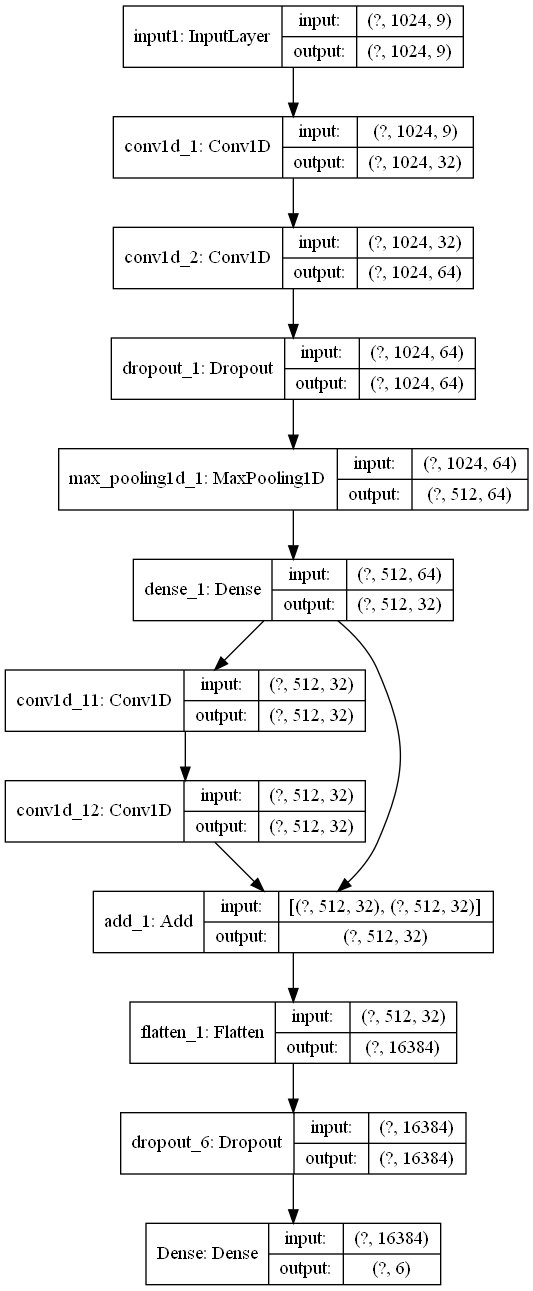

In [32]:
keras.utils.plot_model(merged_model,show_shapes = True)

In [33]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto')  #设置提前中止命令
merged_model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=['categorical_accuracy'])
batch_size = 32
epochs = 50
history = merged_model.fit([train_x], one_hot_train_y, 
                           batch_size=batch_size,
                           epochs=epochs,
                           validation_data=([valid_x], one_hot_valid_y),
                           callbacks = [monitor],
                          shuffle=False)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 22s 458us/step - loss: 0.1569 - categorical_accuracy: 0.5962 - val_loss: 0.1033 - val_categorical_accuracy: 0.8199
Epoch 2/50
48000/48000 [==============================] - 18s 371us/step - loss: 0.0827 - categorical_accuracy: 0.8708 - val_loss: 0.0752 - val_categorical_accuracy: 0.9107
Epoch 3/50
48000/48000 [==============================] - 18s 378us/step - loss: 0.0652 - categorical_accuracy: 0.9363 - val_loss: 0.0640 - val_categorical_accuracy: 0.9398
Epoch 4/50
48000/48000 [==============================] - 18s 376us/step - loss: 0.0573 - categorical_accuracy: 0.9569 - val_loss: 0.0621 - val_categorical_accuracy: 0.9337
Epoch 5/50
48000/48000 [==============================] - 18s 380us/step - loss: 0.0525 - categorical_accuracy: 0.9673 - val_loss: 0.0591 - val_categorical_accuracy: 0.9369
Epoch 6/50
48000/48000 [==============================] - 18s 384us/step - loss: 0.04

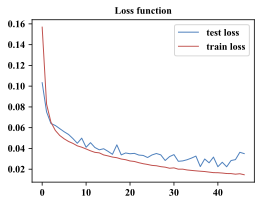

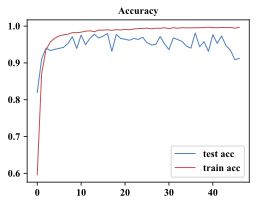

In [34]:
plt.figure(figsize=(4,3))
plt.plot(history.history['val_loss'],color = '#4f81bd',linewidth = 1,label=('test loss'))
plt.plot(history.history['loss'],color ='#c0504d' ,linewidth = 1,label=('train loss'))
plt.xticks(fontproperties = 'Times New Roman', size = 10)
plt.yticks(fontproperties = 'Times New Roman', size = 10)
plt.title('Loss function',fontproperties = 'Times New Roman', size = 10)
plt.legend(prop={'family' : 'Times New Roman', 'size'   : 10})
# plt.savefig('C:\\Users\\shamrockyj\\Desktop\\loss.png', dpi=500, bbox_inches='tight') 

plt.figure(figsize=(4,3))
plt.plot(history.history['val_categorical_accuracy'],linewidth = 1,color = '#4f81bd',label=('test acc'))
plt.plot(history.history['categorical_accuracy'],linewidth = 1,color ='#c0504d',label=('train acc'))
plt.xticks(fontproperties = 'Times New Roman', size = 10)
plt.yticks(fontproperties = 'Times New Roman', size = 10)
plt.title('Accuracy',fontproperties = 'Times New Roman', size = 10) 
plt.legend(prop={'family' : 'Times New Roman', 'size'   : 10})
# plt.savefig('C:\\Users\\shamrockyj\\Desktop\\accuracy.png', dpi=500, bbox_inches='tight') 

In [34]:
# # 保存损失函数和准确率
# pd.DataFrame(history.history['loss']).to_csv("C:/Users/shamrockyj/Desktop/训练集损失函数1.csv")
# pd.DataFrame(history.history['val_loss']).to_csv("C:/Users/shamrockyj/Desktop/测试集损失函数1.csv")
# pd.DataFrame(history.history['categorical_accuracy']).to_csv("C:/Users/shamrockyj/Desktop/训练集准确率1.csv")
# pd.DataFrame(history.history['val_categorical_accuracy']).to_csv("C:/Users/shamrockyj/Desktop/测试集准确率1.csv")

In [47]:
# merged_model.save('VMD_MCNN_Model.h5')

In [35]:
predict_array = merged_model.predict([test_x])
# 计算测试精度
y_predict = np.zeros_like(predict_array)
y_predict[np.arange(len(predict_array)), predict_array.argmax(axis=1)] = 1 #将每行最大值置1，最大值即为预测标签
temp = np.sum(abs(y_predict - one_hot_test_y), axis=1) #将y_predict与test_y相减，每一行取绝对值后相加，不为0的元素即为错误预测
temp[temp>0]=1 #将每一行中不为零的数置1
accuracy = (len(temp)-temp.sum())/len(temp)
print("Test accuracy is:", accuracy)

Test accuracy is: 0.915


In [36]:
5760/6

960.0

In [36]:
label = [np.argmax(item) for item in y_predict]
label
s=set()#定义集合|
for i in label:#循环列表中的元素
    if i not in s:#如果i不在集合中
        s.add(i)#将i添加到集合中
        print('Name:{}\tCount:{}'.format(i+1,label.count(i)))#格式化打印出i、i的count数

Name:6	Count:2035
Name:2	Count:2128
Name:1	Count:2184
Name:4	Count:1869
Name:3	Count:2058
Name:5	Count:1726


#### 绘制混淆矩阵

In [37]:
from pylab import mpl
font = {'family': 'FangSong_GB2312',
            'color': 'k',
            'weight': 'normal',
            'size': 6}
mpl.rcParams['font.family'] = 'FangSong_GB2312'

In [40]:
from sklearn.metrics import confusion_matrix
def cm_plot(original_label, predict_label, pic=None):
    cm = confusion_matrix(original_label, predict_label)
    plt.figure(figsize=(14,14))
    plt.matshow(cm,cmap=plt.cm.Blues)  #画混淆矩阵，配色风格为cm.Blues
    plt.colorbar()#标签颜色
    for x in range(len(cm)):
        for y in range(len(cm)):
            plt.annotate(cm[x,y],xy=(y,x),horizontalalignment='center',verticalalignment='center')
    plt.ylabel('真实标签',fontproperties = 'FangSong_GB2312')
    plt.xlabel('预测标签',fontproperties = 'FangSong_GB2312')

    plt.xticks(fontproperties = 'FangSong_GB2312', size = 10)
    plt.yticks(fontproperties = 'FangSong_GB2312', size = 10)
#     plt.savefig('C:\\Users\\shamrockyj\\Desktop\\测试集的分类结果.png', dpi=300, bbox_inches='tight') 

<Figure size 1008x1008 with 0 Axes>

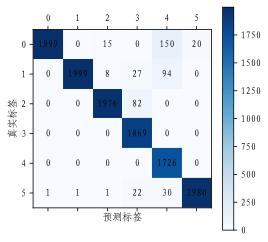

In [41]:
cm_plot(label,test_y)